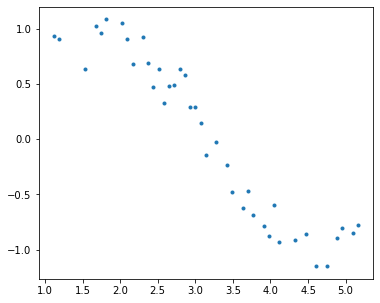

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# First, some general setup - precisin and random seed for reproduceability
rcParams['figure.figsize'] = 6, 5
np.set_printoptions(precision=3)
np.random.seed(39) 

# x range from 60 degree to 300 degree
# Y = sin(x) + noise
X = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(X) + np.random.normal(0,0.15,len(X))

# train-test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.33, random_state=42)

# visualize training data 
plt.plot(X_tr,y_tr,'.')

Text(0.5, 1.0, 'Plot for power: 1')

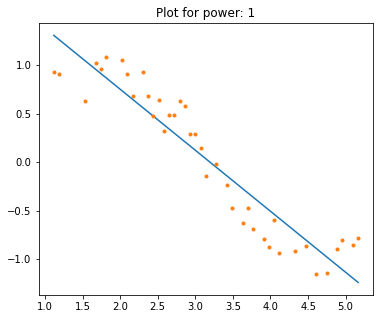

In [2]:
# Use Polynomial features and pipeline to fit data
power = 1
poly_features = PolynomialFeatures(degree = power)
lrg = LinearRegression()
pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
pipeline.fit(X_tr[:,np.newaxis], y_tr)

# Get predication with the model trained with pipeline
pred_train = pipeline.predict(X_tr[:,np.newaxis])
pred_test = pipeline.predict(X_te[:,np.newaxis])

# MSE and RSS
train_mse = mean_squared_error(y_tr,pred_train)
test_mse = mean_squared_error(y_te,pred_test)
train_rss = sum((y_tr - pred_train) ** 2)
test_rss = sum((y_te - pred_test) ** 2)

# Plot
plt.tight_layout()
plt.plot(X_tr[X_tr.argsort()], pred_train[X_tr.argsort()])
plt.plot(X_tr, y_tr,'.')
plt.title('Plot for power: %d'%power)

**Writing Your Own Polynomial Regression Function**

In [3]:
def linear_regression(X_train, y_train, X_test, y_test, power, models_to_plot):
    # Use Polynomial features and pipeline to fit data
    poly_features = PolynomialFeatures(degree = power)
    lrg = LinearRegression()
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
    pipeline.fit(X_train[:,np.newaxis], y_train)
    
    # Get predication with the model trained with pipeline
    pred_train = pipeline.predict(X_train[:,np.newaxis])
    pred_test = pipeline.predict(X_test[:,np.newaxis])
    
    # MSE and RSS
    #Call the mean_squared_error function from sklearn.metrics
    train_mse = mean_squared_error(y_train,pred_train)
    test_mse = mean_squared_error(y_test,pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)

    # Plot
    # here models_to_plot is a dictionary containing the power values you want to plot
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(X_train[X_train.argsort()], pred_train[X_train.argsort()])
        plt.plot(X_train, y_train,'.')
        plt.title('Plot for power: %d'%power)
    
    ret = [train_mse, test_mse, train_rss, test_rss]
    ret.extend([pipeline.steps[1][1].intercept_])
    ret.extend(pipeline.steps[1][1].coef_[1:])
    return ret

             train_rss test_rss
model_pow_1        2.6      1.3
model_pow_2        2.6      1.3
model_pow_3       0.77     0.85
model_pow_4       0.73      0.8
model_pow_5       0.69     0.82
model_pow_6       0.69     0.81
model_pow_7       0.69     0.84
model_pow_8       0.65      1.1
model_pow_9        0.6      1.7
model_pow_10      0.52      1.4
model_pow_11      0.46      1.7
model_pow_12      0.46      2.1
model_pow_13      0.46      1.7
model_pow_14      0.44      2.7
model_pow_15      0.43      2.4


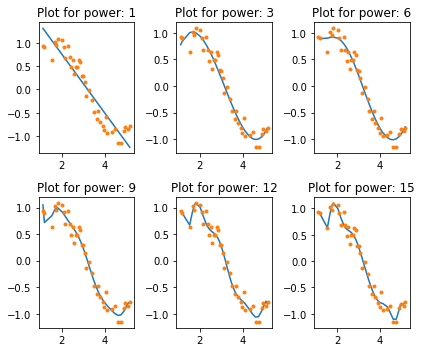

In [4]:
#Initialize a dataframe called coef_matrix_simple to store the results:
col = ['train_mse','test_mse', 'train_rss','test_rss'] + ['w%d'%i for i in range(16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
#If you want, this can also be a list - adjust your fxn definition accordingly
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers (1 - 16) and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+5] = linear_regression(X_tr, y_tr, X_te, y_te, power=i, models_to_plot=models_to_plot)

# print result matrix 
pd.options.display.float_format = '{:,.2g}'.format
print(coef_matrix_simple[['train_rss','test_rss']])   # We display the train + test RSS columns of our dataframe

**Plotting Train and Test RSS**

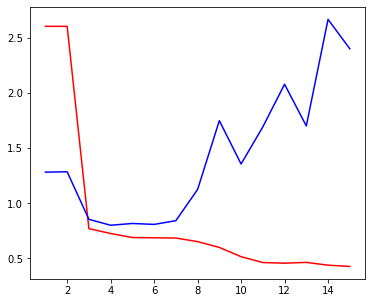

In [5]:
# evenly sampled time at 200ms intervals
poly_deg = np.arange(1,16)

# Red = train RSS; Blue = test RSS
plt.plot(poly_deg, coef_matrix_simple['train_rss'], 'r',  poly_deg, coef_matrix_simple['test_rss'], 'b')
plt.show()

**Writing Your Own Ridge Regression Function**

In [6]:
def ridge_regression(X_train, y_train, X_test, y_test, _lambda, models_to_plot):
    # Use Polynomial features and pipeline to fit data
    poly_features = PolynomialFeatures(degree = 15)
    ridge = Ridge(alpha=_lambda, normalize=True)                    #Note here that we use a ridge regression estimator
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",ridge)])
    pipeline.fit(X_train[:,np.newaxis], y_train)
    
    # Get predication with the model trained with pipeline
    pred_train = pipeline.predict(X_train[:,np.newaxis])
    pred_test = pipeline.predict(X_test[:,np.newaxis])
    
    # MSE and RSS
    train_mse = mean_squared_error(y_train,pred_train)
    test_mse = mean_squared_error(y_test,pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)

    # plot
    if _lambda in models_to_plot:
        plt.subplot(models_to_plot[_lambda])
        plt.tight_layout()
        plt.plot(X_train[X_train.argsort()], pred_train[X_train.argsort()])
        plt.plot(X_train, y_train,'.')
        plt.title('lambda: %.3g'%_lambda)
    
    ret = [train_mse, test_mse, train_rss, test_rss]
    ret.extend([pipeline.steps[1][1].intercept_])
    ret.extend(pipeline.steps[1][1].coef_[1:])
    return ret

C:\Users\j4a3m\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.53607e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


              train_rss test_rss
lambda_1e-15       0.49      1.3
lambda_1e-10       0.65     0.82
lambda_1e-08       0.69      0.8
lambda_0.0001      0.71     0.83
lambda_0.001       0.75     0.79
lambda_0.01           1     0.75
lambda_1            3.8      2.8
lambda_5              9      7.2
lambda_10            11      9.5
lambda_20            14       12


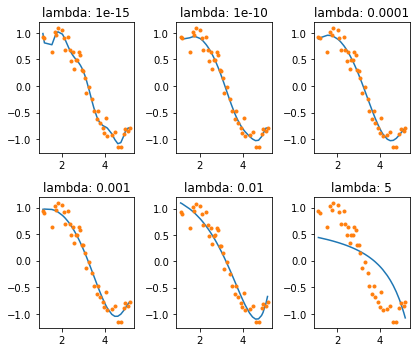

In [7]:
# Set the different values of alpha to be tested
lambda_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# Initialize the dataframe for storing coefficients.
col = ['train_mse','test_mse','train_rss','test_rss'] + ['w%d'%i for i in range(16)]
ind = ['lambda_%.2g'%lambda_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

#Iterate through all powers and assimilate results
for i in range(len(lambda_ridge)):
    coef_matrix_ridge.iloc[i,:20] = ridge_regression(X_tr, y_tr, X_te, y_te, _lambda=lambda_ridge[i], models_to_plot=models_to_plot)

# Print result matrix 
pd.options.display.float_format = '{:,.2g}'.format
print(coef_matrix_ridge[['train_rss','test_rss']])

**Plotting Train and Test RSS**

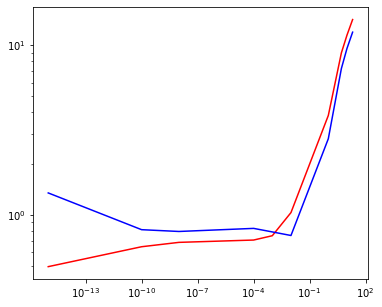

In [8]:
# Red = train RSS; Blue = Test RSS
plt.plot(lambda_ridge, coef_matrix_ridge['train_rss'], 'r', lambda_ridge, coef_matrix_ridge['test_rss'], 'b')

# Why do we adjust the scale displayed here? 
plt.xscale("log")
plt.yscale("log")
plt.show()